Author: Kris Swartzbaugh
CWID: 890939184 
Project 2: NP Training and Validation 
Project Description: 
    Use NumPy to implement vectorized linear and polynomial regression models and compare their performance using seperate training and test sets 
        1. Use the NumPy ‚Äã load()‚Äã method to read the dataset. The data contains two arrays:
'features'‚Äã , which contains the variables CRIM through LSTAT, and ‚Äã 'target'‚Äã , which
contains the variable MEDV.
2. Set aside the first 102 items (20% of the total) as a validation set, and the remaining 404
items for training.
3. Create a scatterplot of the training data showing the relationship between the number of
rooms and the median value of a home. Does the relationship appear to be linear?
4. With RM as ‚Äã X ‚Äã and MEDV as ‚Äã t ‚Äã , use ‚Äã np.linalg.inv()‚Äã to compute ‚Äã w ‚Äã for the training set.
What is the equation for MEDV as a linear function of RM?
5. Use ‚Äã w ‚Äã to add a line representing the least squares fit to your scatter plot from
experiment ‚Äã (3) . ‚Äã How well does the model appear to fit the training set?
6. Use ‚Äã w ‚Äã to find the predicted response for each value of the RM attribute in the training
set, then compute the average loss L for the model.
7. Repeat experiment ‚Äã (6) ‚Äã for the validation set. How do the training and validation MSE
values compare? What accounts for the difference?
8. Repeat experiments ‚Äã (4) ‚Äã , ‚Äã (6) , ‚Äã and ‚Äã (7) ‚Äã using all 13 input features as ‚Äã X . ‚Äã How do the training
and validation MSEs for this model compare to the values you found for experiment ‚Äã (7) ‚Äã .
What accounts for the difference?
9. Based on the value for ‚Äã w ‚Äã for the new model, how much does a one unit increase in each
feature change the median value of the home? Based on the description of the dataset
provided by StatLib, convert your answer to dollars.
10. Based on the amount of change in the value of a home, which features are most
important?


        

Cells Provided:
    Markdown cell 1: This cell, author info and project description
    Code Cell 1: library imports 
    Markdown cell 2: description of the data being analyzed 
    Code Cell 2: Loading and handling of data 
    Code Cell 3: Questions 2 and 3 
    Code Cell 4: Question 4
    Code Cell 5: Question 5 and 6 
    Code Cell 6: Question 7
    Code Cell 8: Question 8
    Code Cell 9: Question 8 repeated attempt 
   

Shortcommings:
1)Question 8 output for w is 26 values instead of the expected 13, making it impossible to continue on to questions 9 and 10. Repeated attempt is currently having difficulty with matrix dimensions. 

In [69]:
import numpy as np 
import matplotlib.pyplot as plt

 Variables in order (features):
[0] CRIM     per capita crime rate by town
[1] ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
[2] INDUS    proportion of non-retail business acres per town
[3] CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
[4] NOX      nitric oxides concentration (parts per 10 million)
[5] RM       average number of rooms per dwelling
[6] AGE      proportion of owner-occupied units built prior to 1940
[7] DIS      weighted distances to five Boston employment centres
[8] RAD      index of accessibility to radial highways
[9] TAX      full-value property-tax rate per $10,000
[10] PTRATIO  pupil-teacher ratio by town
[11] B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
[13] LSTAT    % lower status of the population
[14] MEDV     Median value of owner-occupied homes in $1000's

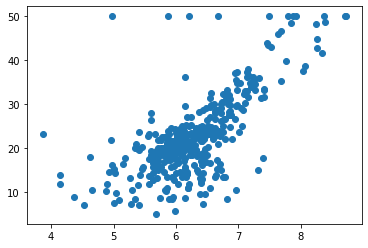

In [70]:
features = np.load('/home/kris/projects/483 Jupyter Notebook /features.npy')
target = np.load('/home/kris/projects/483 Jupyter Notebook /target.npy')


#set aside 102 items (20%) for validation 
featuresValidate = features[:102][:]
targetValidate = target[:102][:]
features = features[102:][:]
target = target[102:]


#Next: Create a scatterplot of the training data showing the relationship between the number of 
            #rooms and the median value of a home. Does the relationship appear to be linear?
    

#Scatterplot of the training data showing the relationship between the number of rooms and median value of a home   
plt.scatter(features[:,5], target)
plt.show()
# This data does appear to be linear






In [71]:
# (4) With RM as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of RM?
#initialize empty and ones np.arrays 
Y = np.ones((402,1))
Z = np.empty((402,1))
t = np.empty((402,1))
#fill with target and featured data
for i in range(402):
    Z[i] = features[:,5][i]
    t[i] = target[i]
#combine for a proper X array
X = np.concatenate((Y,Z),axis = 1)
#compute X inverse and X.T
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
#compute W 
w = np.dot(invXX,Xt)
print(w)

# the equation is MEDV = -34.20845325 + 9.05112595*RM

[[-34.20845325]
 [  9.05112595]]


Average Squared Loss:  3.856284996927644


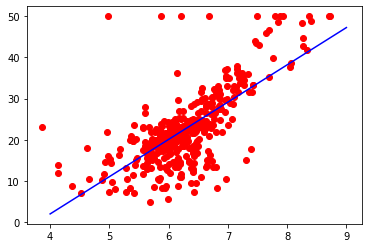

In [72]:
# (5) Use w to add a line representing the least squares fit to your scatter plot from experiment (3). How well does the model appear to fit the training set?

testx = np.linspace(4,9,70)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
# print(testX)
testt = np.dot(testX,w)

#plot the scatter plot and the linear model 
plt.plot(Z,t,'ro')
plt.plot(testx,testt,'b')
#The line appears to be a good fit of the data, but there is a lot of variance among the data 


# (6) Use w to find the predicted response for each value of the RM attribute in the training set, then compute the average loss ùìõ for the model.

#create prediction values for the data set using the w calculated
tpredict = np.empty((402,1))
for i in range(len(tpredict)):
    tpredict[i] = w[0]+w[1]*Z[i]

#compute the lease squared loss 
squaredLoss = np.empty((402,1))

#Computer the average squared loss of the training  set compared to predicted outcome 
for i in range(len(squaredLoss)):
    a = (float(t[0]-tpredict[0]))
    a = a*a
    squaredLoss[i]=a
lossAvg = np.average(squaredLoss)
print("Average Squared Loss: ", lossAvg)




In [73]:
# (7) Repeat experiment (6) for the test set. How do the training and test MSE values compare? What accounts for the difference?
#featuresValidate
#targetValidate
ZZ = np.ones((102,1))
tt = np.empty((102,1))
for i in range(102):
    ZZ[i] = featuresValidate[:,5][i]
    tt[i] = targetValidate[i]
for i in range(102):
    tt[i] = targetValidate[i]
    
#create prediction values for the data set using the w calculated
tpredictTT = np.empty((102,1))
for i in range(len(tpredictTT)):
    tpredictTT[i] = w[0]+w[1]*ZZ[i]

#initialize least squared loss 
squaredLoss1 = np.empty((102,1))

#Compute squared loss for each validation data point
for i in range(len(squaredLoss1)):
    aa = (float(tt[0]-tpredictTT[0]))
    aa = aa*aa
    squaredLoss[i]=aa
#compute average squared lost
lossAvg = np.average(squaredLoss1)
print("Average Squared Loss: ", lossAvg)
#average squared loss is 22.99, much higher than on the training data set. 


Average Squared Loss:  22.9964374725777


In [74]:
#(8) use np.linalg.inv() to compute w for the training set using all of the input values 
# Use w to find the predicted response for each value of the RM attribute in the training set, then compute the average loss ùìõ for the model.
# Use W to find the predicted response for each value in the training set, and compute the average squared loss 

x_all = features
i = np.ones((404,1))
X_all = np.hstack((i,x_all))
XX_all = np.dot(X_all.T,X_all)
inv_XX_all = np.linalg.inv(XX_all)
Xt_all = np.dot(X_all.T, target)
w = np.dot(inv_XX_all,Xt_all)
for data in w:
    print(data)

# The equation with the calculated w is as follows:
#     SL[item] = w[0]+w[1]*features[item][0] + w[2]*features[item][1] + w[3]*features[item][2] + w[4]*features[item][3] + w[5]*features[item][4] + w[6]*features[item][5] + w[7]*features[item][6] + w[8]*features[item][7] + w[9]*features[item][8] + w[10]*features[item][9] + w[11]*features[item][10] + w[12]*features[item][11] + w[13]*features[item][12]

#compute the average squared loss of 
SL = np.empty((404,1)) # SL = squared loss
for item in range(len(SL)):
    SL[item] = w[0]+w[1]*features[item][0] + w[2]*features[item][1] + w[3]*features[item][2] + w[4]*features[item][3] + w[5]*features[item][4] + w[6]*features[item][5] + w[7]*features[item][6] + w[8]*features[item][7] + w[9]*features[item][8] + w[10]*features[item][9] + w[11]*features[item][10] + w[12]*features[item][11] + w[13]*features[item][12]
    SL[item]= ((SL[item]-target[item]))**2
avgLoss = np.average(SL) #avg Loss = 21.8
print(avgLoss)


#compute the average squared loss of the training set 
SLtraining = np.empty((102,1))
for item in range(len(SLtraining)):
    SLtraining[item] = w[0]+w[1]*featuresValidate[item][0] + w[2]*featuresValidate[item][1] + w[3]*featuresValidate[item][2] + w[4]*featuresValidate[item][3] + w[5]*featuresValidate[item][4] + w[6]*featuresValidate[item][5] + w[7]*featuresValidate[item][6] + w[8]*featuresValidate[item][7] + w[9]*featuresValidate[item][8] + w[10]*featuresValidate[item][9] + w[11]*featuresValidate[item][10] + w[12]*featuresValidate[item][11] + w[13]*featuresValidate[item][12]
    SLtraining[item]= ((SLtraining[item]-targetValidate[item]))**2
avgLossTraining = np.average(SLtraining) #avg Loss = 22.86368 (very close to the training data)
print(avgLossTraining)


31.964240937708382
-0.11455286082089144
0.044893213009297384
0.028375569758667396
2.709097418694938
-16.740367150860948
4.111482091304794
-0.0008479050808641864
-1.3849390491423605
0.32108456938247354
-0.012249711458006018
-0.9125235000500993
0.010253363767853907
-0.4784146313778983
21.807199582316603
22.863680896368106


In [75]:
# (9) Based on the value for ‚Äã w ‚Äã for the new model, how much does a one unit increase in each feature change the median value of the home? Based on the description of the dataset provided by StatLib, convert your answer to dollars.

#the price unit of the data is 1000's of dollars, so multiply w by 10000

wincrease = w*1000
print(wincrease[1], "Crim")
print(wincrease[2], "ZN")
print(wincrease[3], "INDUS")
print(wincrease[4], "CHAS")
print(wincrease[5], "NOX")
print(wincrease[6], "RM")
print(wincrease[7], "AGE")
print(wincrease[8], "DIS")
print(wincrease[9], "RAD")
print(wincrease[10], "TAX")
print(wincrease[11], "PTRATIO")
print(wincrease[12], "B")
print(wincrease[13], "LSTAT")


# 10 Based on the amount of change in the value of a home, which features are most important?

#The variables that have the highest effect on value of a home are as follows:
# 1) RM 

"""
 Variables in order (features):
[0] CRIM     per capita crime rate by town
[1] ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
[2] INDUS    proportion of non-retail business acres per town
[3] CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
[4] NOX      nitric oxides concentration (parts per 10 million)
[5] RM       average number of rooms per dwelling
[6] AGE      proportion of owner-occupied units built prior to 1940
[7] DIS      weighted distances to five Boston employment centres
[8] RAD      index of accessibility to radial highways
[9] TAX      full-value property-tax rate per $10,000
[10] PTRATIO  pupil-teacher ratio by town
[11] B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
[13] LSTAT    % lower status of the population
[14] MEDV     Median value of owner-occupied homes in $1000's
"""

-114.55286082089144 Crim
44.893213009297384 ZN
28.375569758667396 INDUS
2709.097418694938 CHAS
-16740.367150860948 NOX
4111.482091304793 RM
-0.8479050808641864 AGE
-1384.9390491423605 DIS
321.08456938247355 RAD
-12.249711458006018 TAX
-912.5235000500993 PTRATIO
10.253363767853907 B
-478.41463137789833 LSTAT
Object `important` not found.


"\n Variables in order (features):\n[0] CRIM     per capita crime rate by town\n[1] ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n[2] INDUS    proportion of non-retail business acres per town\n[3] CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n[4] NOX      nitric oxides concentration (parts per 10 million)\n[5] RM       average number of rooms per dwelling\n[6] AGE      proportion of owner-occupied units built prior to 1940\n[7] DIS      weighted distances to five Boston employment centres\n[8] RAD      index of accessibility to radial highways\n[9] TAX      full-value property-tax rate per $10,000\n[10] PTRATIO  pupil-teacher ratio by town\n[11] B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n[13] LSTAT    % lower status of the population\n[14] MEDV     Median value of owner-occupied homes in $1000's\n"

10 Based on the amount of change in the value of a home, which features are most important?

The variables that have the highest effect on value of a home are as follows:
1) NOX with $16740 house price decrease per unit NOX increase (parts per ten million) 
2) RM with $4111 house price increase per unit RM increase (1 unit 1 room) 
2) CHAS with $2709 house price increase per unit CHAS increase (1 if it bounds river, 0 otherwise) 
3) DIS with a $1384 house price increase per unit DIS increase (weighted distance to 5 boston employment centers)